## Analysis of World Cup Data
  
  #### By Rasaq Olalekan
  
  
  - The dataset contains some data about world cup tournament from 1932 to 2014(some years excluded). 
  - The aim of this project is to analyze the data so as to provide answer and insights into some question about the record of world cup tournaments.

### Load dataset into Panda dataframe

In [1]:
import pandas as pd

raw_df = pd.read_csv('world-cup-data.csv')
raw_df

,game_id,attendance,team,tie,pk,stage,round,year,date,time,stadium,home,lat,long,referee,booked,url,goals,team_num
0,1,25000,Italy,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,7,1
1,1,25000,USA,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,1,2
2,2,16000,Austria,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,3,1
3,2,16000,France,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,2,2
4,3,8000,Germany,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,835,57000,Austria,False,False,1/2 FINAL,False,1954,30-06-1954 (18:00 h),18:00,St. Jakob (Basel),Switzerland,47.5422544,7.6100127,Vincenzo Orlandini (ITA),NaN,1954_SWITZERLAND_FS.htm,1,2
1668,836,32000,Austria,False,False,PLACES 3-4,False,1954,3-07-1954 (17:00 h),17:00,Hardturm (ZÃÂ¼rich),Switzerland,47.393411,8.503633,Paul Wyssling (SWI),NaN,1954_SWITZERLAND_FS.htm,3,1
1669,836,32000,Uruguay,False,False,PLACES 3-4,False,1954,3-07-1954 (17:00 h),17:00,Hardturm (ZÃÂ¼rich),Switzerland,47.393411,8.503633,Paul Wyssling (SWI),NaN,1954_SWITZERLAND_FS.htm,1,2
1670,837,62472,FRG,False,False,FINAL ROUND,False,1954,4-07-1954 (17:00 h),17:00,Wankdorf (Bern),Switzerland,46.963112,7.464874,William Ling (ENG),NaN,1954_SWITZERLAND_FS.htm,3,1


In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   game_id     1672 non-null   int64 
 1   attendance  1672 non-null   int64 
 2   team        1672 non-null   object
 3   tie         1672 non-null   bool  
 4   pk          1672 non-null   object
 5   stage       1672 non-null   object
 6   round       1672 non-null   object
 7   year        1672 non-null   int64 
 8   date        1672 non-null   object
 9   time        1672 non-null   object
 10  stadium     1672 non-null   object
 11  home        1672 non-null   object
 12  lat         1672 non-null   object
 13  long        1672 non-null   object
 14  referee     1672 non-null   object
 15  booked      576 non-null    object
 16  url         1672 non-null   object
 17  goals       1672 non-null   int64 
 18  team_num    1672 non-null   int64 
dtypes: bool(1), int64(5), object(13)
memory usage: 2

We only have missing values for the column 'booked' in our dataframe. Since the column does not have any significance to our analysis, we are going to ignore the missing values

### Data Preparation and Cleaning


1. We will divide our dataframe into two base on team number: one for the first team and the other for the second team with the same game ID. This is done to ensure that a game is fully represented on a row.
   
   This will also avoid us the stress of having too much duplicate values which can affect our analysis.

In [3]:
df1 = raw_df[raw_df.team_num == 1]
df1

,game_id,attendance,team,tie,pk,stage,round,year,date,time,stadium,home,lat,long,referee,booked,url,goals,team_num
0,1,25000,Italy,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,7,1
2,2,16000,Austria,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,3,1
4,3,8000,Germany,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm,5,1
6,4,9000,Czechoslovakia,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Stadio del Littorio (Trieste),Italy,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm,2,1
8,5,33000,Switzerland,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,San Siro (Milano),Italy,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,833,17000,FRG,False,False,1/4 FINAL,False,1954,27-06-1954 (17:00 h),17:00,Les Charmilles (GenÃÂ¨ve),Switzerland,46.2080508,6.1227005,IstvÃÂ¡n Zsolt (HUN),NaN,1954_SWITZERLAND_FS.htm,2,1
1664,834,45000,Hungary,False,False,1/2 FINAL,False,1954,30-06-1954 (18:00 h),18:00,Stade Olympique de la Pontaise (Lausanne),Switzerland,46.533333,6.624167,Mervyn Griffiths (WAL),NaN,1954_SWITZERLAND_FS.htm,4,1
1666,835,57000,FRG,False,False,1/2 FINAL,False,1954,30-06-1954 (18:00 h),18:00,St. Jakob (Basel),Switzerland,47.5422544,7.6100127,Vincenzo Orlandini (ITA),NaN,1954_SWITZERLAND_FS.htm,6,1
1668,836,32000,Austria,False,False,PLACES 3-4,False,1954,3-07-1954 (17:00 h),17:00,Hardturm (ZÃÂ¼rich),Switzerland,47.393411,8.503633,Paul Wyssling (SWI),NaN,1954_SWITZERLAND_FS.htm,3,1


In [4]:
df1.reset_index(inplace=True, drop=True)
df1.head(5)

,game_id,attendance,team,tie,pk,stage,round,year,date,time,stadium,home,lat,long,referee,booked,url,goals,team_num
0,1,25000,Italy,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,7,1
1,2,16000,Austria,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,3,1
2,3,8000,Germany,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm,5,1
3,4,9000,Czechoslovakia,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Stadio del Littorio (Trieste),Italy,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm,2,1
4,5,33000,Switzerland,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,San Siro (Milano),Italy,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm,3,1


In [5]:
df2 = raw_df[raw_df.team_num == 2]

df2.reset_index(inplace=True, drop=True)
df2.head(5)

,game_id,attendance,team,tie,pk,stage,round,year,date,time,stadium,home,lat,long,referee,booked,url,goals,team_num
0,1,25000,USA,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,1,2
1,2,16000,France,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,2,2
2,3,8000,Belgium,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm,2,2
3,4,9000,Romania,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,Stadio del Littorio (Trieste),Italy,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm,1,2
4,5,33000,Netherlands,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,San Siro (Milano),Italy,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm,2,2


Now we have the two teams in a game seperated into two dataframes. 

Next, we will merge the two dataframe.

In [6]:
merged_df = df1.merge(df2, on='game_id')
merged_df.head(5)

,game_id,attendance_x,team_x,tie_x,pk_x,stage_x,round_x,year_x,date_x,time_x,...,time_y,stadium_y,home_y,lat_y,long_y,referee_y,booked_y,url_y,goals_y,team_num_y
0,1,25000,Italy,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,...,16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,1,2
1,2,16000,Austria,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,2,2
2,3,8000,Germany,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm,2,2
3,4,9000,Czechoslovakia,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,16:30,Stadio del Littorio (Trieste),Italy,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm,1,2
4,5,33000,Switzerland,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,16:30,San Siro (Milano),Italy,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm,2,2


Due to the merging, we now have duplicate columns such as attendance, tie, pk, year and so on.

Next, we will remove the duplicate columns regardless of the different column name.

In [7]:
new_df = merged_df.T.drop_duplicates().T
new_df.head(5)

,game_id,attendance_x,team_x,tie_x,pk_x,stage_x,round_x,year_x,date_x,time_x,...,lat_x,long_x,referee_x,booked_x,url_x,goals_x,team_num_x,team_y,goals_y,team_num_y
0,1,25000,Italy,False,False,FIRST ROUND,False,1934,27-05-1934 (16:00 h),16:00,...,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm,7,1,USA,1,2
1,2,16000,Austria,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm,3,1,France,2,2
2,3,8000,Germany,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm,5,1,Belgium,2,2
3,4,9000,Czechoslovakia,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm,2,1,Romania,1,2
4,5,33000,Switzerland,False,False,FIRST ROUND,False,1934,27-05-1934 (16:30 h),16:30,...,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm,3,1,Netherlands,2,2


Now, the duplicates columns have been removed. 

Let's rename and rearrange the dataframe columns in a more appropriate order.

In [8]:
new_df.columns = new_df.columns.str.replace('_x', '')
new_df = new_df[['game_id', 'attendance', 'team', 'team_num', 'goals', 'team_y', 
                 'team_num_y', 'goals_y', 'tie', 'pk', 'stage', 'round', 'year', 
                 'date', 'time', 'stadium', 'home', 'lat', 'long', 'referee', 'booked', 'url']]
new_df.rename(columns = {'team':'team_1', 'team_num':'team1_num', 'goals': 'goals_team1', 'team_y': 'team_2',
                         'team_num_y': 'team2_num', 'goals_y': 'goals_team2'}, inplace = True)
new_df.head(5)

,game_id,attendance,team_1,team1_num,goals_team1,team_2,team2_num,goals_team2,tie,pk,...,year,date,time,stadium,home,lat,long,referee,booked,url
0,1,25000,Italy,1,7,USA,2,1,False,False,...,1934,27-05-1934 (16:00 h),16:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,RenÃÂ© Mercet (SWI),NaN,1934_ITALY_FS.htm
1,2,16000,Austria,1,3,France,2,2,False,False,...,1934,27-05-1934 (16:30 h),16:30,Benito Mussolini (Torino),Italy,45.066251,7.691228,John van Moorsel (NED),NaN,1934_ITALY_FS.htm
2,3,8000,Germany,1,5,Belgium,2,2,False,False,...,1934,27-05-1934 (16:30 h),16:30,Giovanni Berta (Firenze),Italy,44.275234,11.722625,Francesco Mattea (ITA),NaN,1934_ITALY_FS.htm
3,4,9000,Czechoslovakia,1,2,Romania,2,1,False,False,...,1934,27-05-1934 (16:30 h),16:30,Stadio del Littorio (Trieste),Italy,45.62243,13.792906,Jean Langenus (BEL),NaN,1934_ITALY_FS.htm
4,5,33000,Switzerland,1,3,Netherlands,2,2,False,False,...,1934,27-05-1934 (16:30 h),16:30,San Siro (Milano),Italy,45.478124,9.123962,Ivan Eklind (SWE),NaN,1934_ITALY_FS.htm


Let us export the dataframe into CSV format and save.

In [9]:
new_df.to_csv('cleaned_world_cup_data.csv', index=False)

Now, we are done with data preprocessing and cleaning.

Next, we will do some exploratory data analysis to derive insights.

## Exploratory Data Analysis

#### 1. First, let's see the sum of attendance per world cup year and sort it from the highest to lowest.

In [10]:
attendance_df = new_df.groupby('year')[['attendance']].sum().sort_values('attendance', ascending=False)
attendance_df =attendance_df.head(10) # we will only few the top 10 years with highest attendance in descending order 
attendance_df

,attendance
year,
1994,3567188
2014,3429873
2006,3352605
2010,3178856
1998,2897430
2002,2705566
1990,2514535
1986,2279683
1974,1835775


As seen above, the highest attendance was recorded in 1994.

Let's visualize it using a bar graph

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['figure.figsize'] = (20, 12)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/home/akinkunmi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


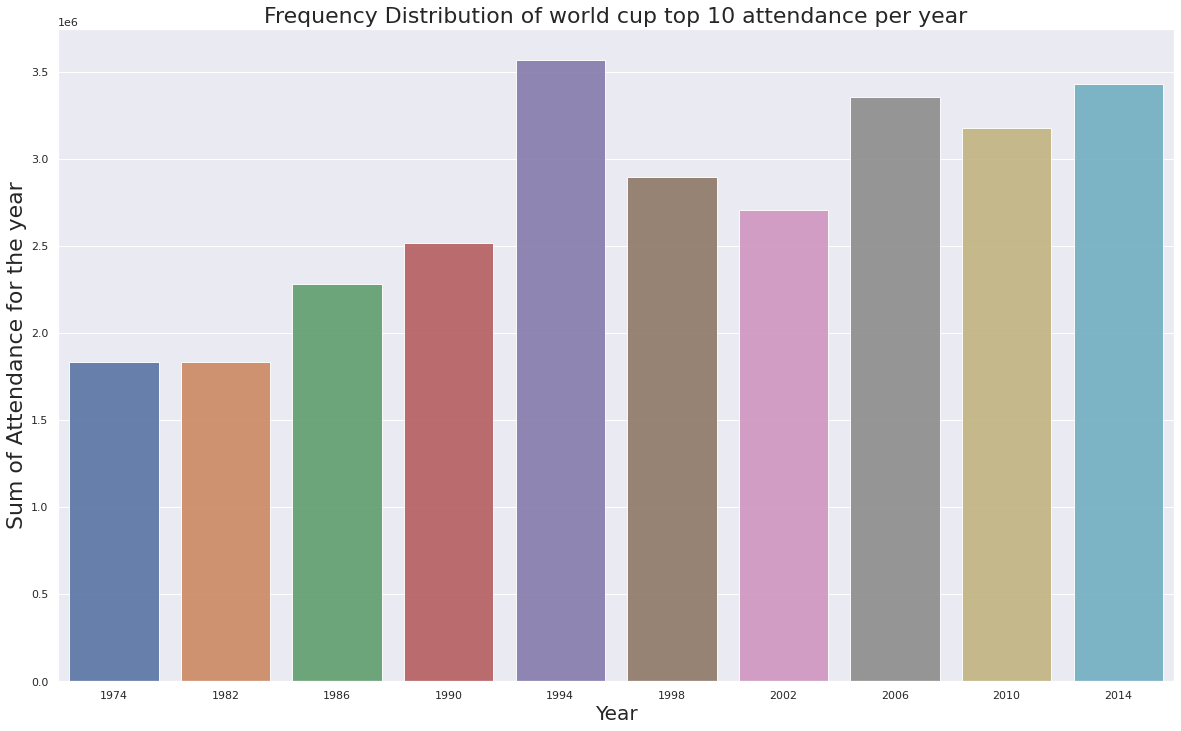

In [12]:
sns.set(style="darkgrid")
sns.barplot(attendance_df.index, attendance_df.attendance, alpha=0.9)
plt.title('Frequency Distribution of world cup top 10 attendance per year', fontsize=22)
plt.ylabel('Sum of Attendance for the year', fontsize=22)
plt.xlabel('Year', fontsize=20)
plt.show()

It can be infered from the above visualization that the largest attendance is recorded in 1994

...

It may also interest us to find world cup match with the largest attendance in the history of football. Therefore, we will sort of dataset to feature top 10 world cup matches with largest attendance.

In [46]:
match_attendance = new_df[['attendance', 'team_1', 'team_2', 'stage', 
        'stadium', 'year', 'date']].sort_values('attendance', ascending= False)
match_attendance.head(10)

,attendance,team_1,team_2,stage,stadium,year,date
309,179854,Uruguay,Brazil,FINAL ROUND,MaracanÃÂ£ (Rio de Janeiro),1950,16-07-1950 (15:00 h)
307,152772,Brazil,Spain,FINAL ROUND,MaracanÃÂ£ (Rio de Janeiro),1950,13-07-1950 (15:00 h)
298,142429,Brazil,Yugoslavia,GROUP STAGE,MaracanÃÂ£ (Rio de Janeiro),1950,1-07-1950 (15:00 h)
304,138886,Brazil,Sweden,FINAL ROUND,MaracanÃÂ£ (Rio de Janeiro),1950,9-07-1950 (15:00 h)
236,114600,Mexico,Paraguay,GROUP STAGE,Estadio Azteca (MÃÂ©xico D.F.),1986,7-06-1986 (12:00 h)
269,114580,Argentina,FRG,FINAL ROUND,Estadio Azteca (MÃÂ©xico D.F.),1986,29-06-1986 (12:00 h)
254,114580,MÃÂ©xico,Bulgaria,1/8 FINAL,Estadio Azteca (MÃÂ©xico D.F.),1986,15-06-1986 (12:00 h)
264,114580,Argentina,England,1/4 FINAL,Estadio Azteca (MÃÂ©xico D.F.),1986,22-06-1986 (12:00 h)
267,110420,Argentina,Belgium,1/2 FINAL,Estadio Azteca (MÃÂ©xico D.F.),1986,25-06-1986 (16:00 h)
224,110000,Belgium,Mexico,GROUP STAGE,Estadio Azteca (MÃÂ©xico D.F.),1986,3-06-1986 (12:00 h)


From the result above, the largest attendance for a world cup marge was recorded in a final match between Uruguay and Brazil in the year 1950. 179,854 were in attendance.

#### 2. Let's the number of goals by each country. We will also rank the top 10 countries by goals.

In [13]:
goals_df = new_df.groupby("team_1").goals_team1.sum().reset_index()
goals_df1 = new_df.groupby("team_2").goals_team2.sum().reset_index()
goals_df.rename(columns = {'team_1':'team'}, inplace = True)
goals_df1.rename(columns = {'team_2':'team'}, inplace = True)
total_goals = goals_df.merge(goals_df1, on='team')
total_goals['total_goals'] = total_goals['goals_team1'] + total_goals['goals_team2']
total_goals

,team,goals_team1,goals_team2,total_goals
0,Algeria,5,8,13
1,Angola,0,1,1
2,Argentina,108,23,131
3,Australia,7,4,11
4,Austria,31,12,43
...,...,...,...,...
72,United Arab Emirates,0,2,2
73,Uruguay,62,18,80
74,Wales,3,1,4
75,Yugoslavia,45,15,60


Let's sort the goals scored by top 10 countries in descending order and visualize it

In [14]:
country_goals = total_goals[['team', 'total_goals']].sort_values('total_goals', ascending= False)
country_goals.reset_index(inplace=True, drop=True)
country_goals

,team,total_goals
0,Brazil,220
1,Argentina,131
2,FRG,131
3,Italy,128
4,France,106
...,...,...
72,Iraq,1
73,Trinidad and Tobago,0
74,Canada,0
75,China,0


In [15]:
# Let us show the first 10 countries with highest world cup goals
country_df = country_goals.head(10)
country_df

,team,total_goals
0,Brazil,220
1,Argentina,131
2,FRG,131
3,Italy,128
4,France,106
5,Germany,93
6,Spain,91
7,Netherlands,87
8,England,80
9,Uruguay,80


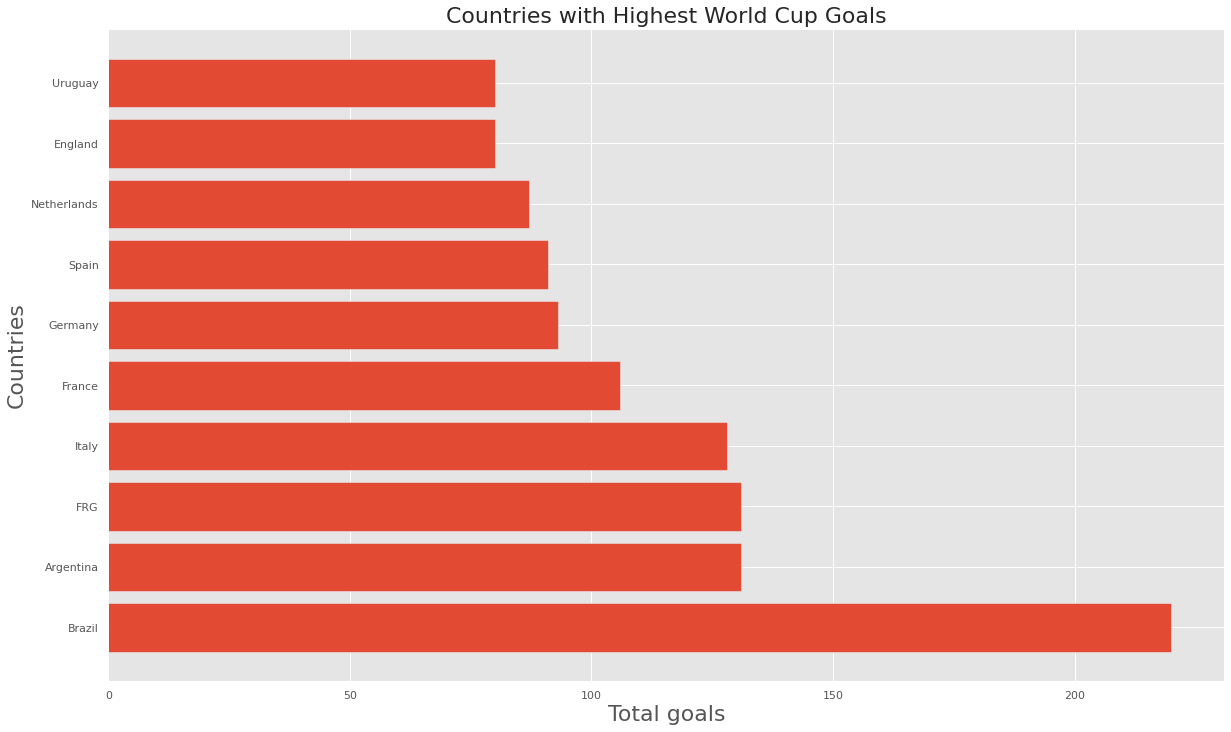

In [16]:
plt.style.use('ggplot')
plt.barh(country_df['team'], country_df['total_goals'] )
plt.title('Countries with Highest World Cup Goals', fontsize=22)
plt.ylabel('Countries', fontsize=22)
plt.xlabel('Total goals', fontsize=22)
plt.show()

Brazil has the highest number of goals in the history of world cup. Brazil has 220 goals so far based on the data available

#### 3. Let's determine the no of stadium used for world cup

In [17]:
stadium = set(new_df['stadium'])
len(stadium)

185

185 stadia have been used for world cup based on the given dataset

#### 4. Let's prepare a dataframe for teams that appear in final of world cup

In [31]:
final_rounds = new_df[new_df.stage == 'FINAL ROUND'].sort_values('year')
final_rounds.reset_index(inplace=True, drop=True)
final_rounds.head(5) # we will visualize just five rows 

,game_id,attendance,team_1,team1_num,goals_team1,team_2,team2_num,goals_team2,tie,pk,...,year,date,time,stadium,home,lat,long,referee,booked,url
0,218,68346,Uruguay,1,4,Argentina,2,2,False,False,...,1930,30-07-1930 (15:30 h),15:30,Estadio del Centenario (Montevideo),Uruguay,-34.894834,-56.153668,Jean Langenus (BEL),NaN,1930_URUGUAY_FS.htm
1,17,50000,Italy,1,2,Czechoslovakia,2,1,False,False,...,1934,10-06-1934 (17:00 h),17:00,Stadio Nazionale del PNF (Roma),Italy,41.926953,12.472197,Ivan Eklind(SWE),NaN,1934_ITALY_FS.htm
2,289,45124,Italy,1,4,Hungary,2,2,False,False,...,1938,19-06-1938 (17:00 h),17:00,Stade Olympique de Colombes (Paris),France,48.929266,2.247777,George Capdeville (FRA),NaN,1938_FRANCE_FS.htm
3,311,179854,Uruguay,1,2,Brazil,2,1,False,False,...,1950,16-07-1950 (15:00 h),15:00,MaracanÃÂ£ (Rio de Janeiro),Brazil,-22.912109,-43.230156,George Reader (ENG),NaN,1950_BRAZIL_FS.htm
4,309,152772,Brazil,1,6,Spain,2,1,False,False,...,1950,13-07-1950 (15:00 h),15:00,MaracanÃÂ£ (Rio de Janeiro),Brazil,-22.912109,-43.230156,Reginald Leafe (ENG),NaN,1950_BRAZIL_FS.htm


The dataframe above contains the teams that appear in final of world cup.

Next, let us analyze teams that featured most in world cup final.

In [39]:
top_team = raw_df[raw_df.stage == 'FINAL ROUND']['team'].value_counts()
top_team

Brazil            9
FRG               6
Italy             6
Argentina         5
Sweden            4
Spain             4
Uruguay           4
Netherlands       3
Germany           2
France            2
Czechoslovakia    2
Hungary           2
England           1
Name: team, dtype: int64

From the result above, Brazil top the list haven feature in world cup final 9 times

/home/akinkunmi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


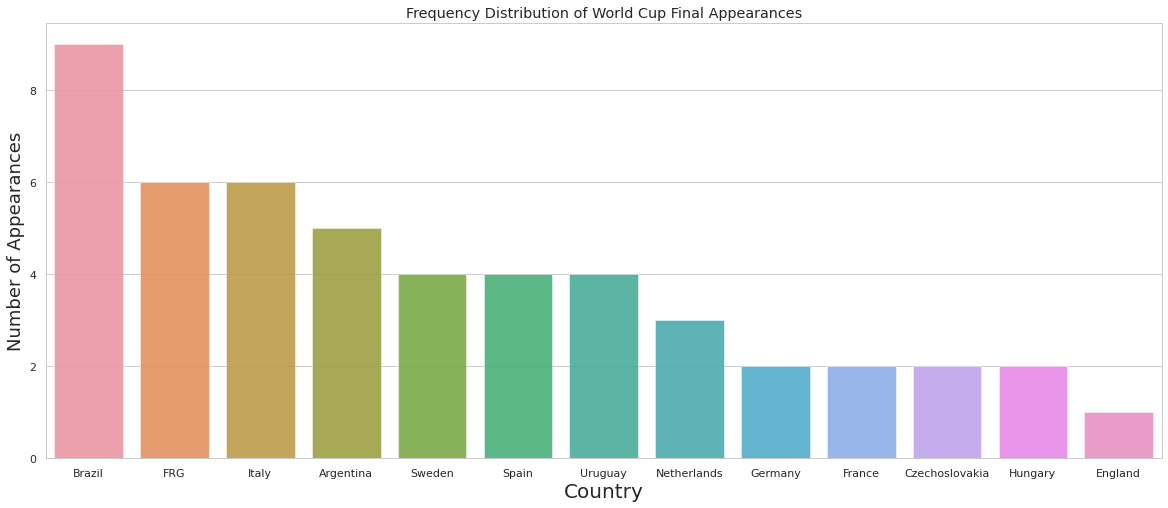

In [42]:
matplotlib.rcParams['figure.figsize'] = (20, 8)
sns.set_style('whitegrid')
sns.barplot(top_team.index, top_team.values, alpha=0.9)
plt.title('Frequency Distribution of World Cup Final Appearances')
plt.ylabel('Number of Appearances', fontsize=18)
plt.xlabel('Country', fontsize=20)
plt.show()

## Conclusion

We have been able to give answers and some insights to questions on world cup tournaments through analysis. We have been able to discover the following:
  - The year in which we have largest attendance of total world cup tournaments in a year is 1994. However, the single world cup match that recorded the largest attendance is a final match between Uruguay and Brazil in July, 1950.
  - Brazil has the highest number of goals so far in the history of world cup with a total of 220 goals. Canada, China and Zaire have been revealed to have not scored any goal in world cup tournament.
  - A total of 185 stadia have been used so far for world cup matches (this is only applicable for the years covered in this dataset)
  - Brazil has entered more world cup finals than any other country in the history of world cup. Brazil has featured in 9 finals altogether.